# Probando librería mapsutils creada para uso en el proyecto

In [124]:
from mapsutils import Localizacion, Ruta, OpenService, BingService

## Inicializar la librería

In [125]:
API_BING_KEY = '<Key>'
API_OPEN_KEY = '<Key>'
open_service = OpenService(api_open_key=API_OPEN_KEY, api_bingmaps_key=API_BING_KEY)
bing_service = BingService(API_BING_KEY)

In [126]:
direccion_inicial = "Carrera 111c #81-30, Bogotá, Colombia"
direccion_final = "Universidad Javeriana, Bogotá Colombia"

## Crear localizaciones

In [127]:
localizacion_inicial = Localizacion(direccion=direccion_inicial, map_service=open_service)
localizacion_final = Localizacion(direccion=direccion_final, map_service=open_service)

## Funciones para obtener latitud y longitud de las direcciónes

In [128]:
latlng_inicial = localizacion_inicial.obtener_latlng()
latlng_final = localizacion_final.obtener_latlng()

#También se puede obtener la dirección de una latitud y longitud
latlng_prueba = (4.695128, -74.086825)
Localizacion_prueba = Localizacion(latlng=latlng_prueba, map_service=open_service)
direccion_prueba = Localizacion_prueba.obtener_direccion()

In [129]:
print("Latitud y longitud inicial: {}".format(latlng_inicial))
print("Latitud y longitud final: {}".format(latlng_final))

print("Dirección prueba: {}".format(direccion_prueba))

Latitud y longitud inicial: (4.7072153, -74.1306008)
Latitud y longitud final: (4.628766199999999, -74.06362986475955)
Dirección prueba: Titán Plaza, Calle 86A, Las Ferias, UPZ Las Ferias, Localidad Engativá, Bogotá, Bogotá Distrito Capital, Región Andina, 111021, Colombia


## Funciones para obtener las distancias entre dos lugares

### Se crea un objeto Ruta para hallar los valores de esta ruta

In [130]:
ruta = Ruta(bing_service, localizacion_inicial, localizacion_final)

In [131]:
# Método #1 para obtener la distancia entre dos puntos
distancia1 = ruta.distancia_geodesica_kilometros()

# Método #2 para obtener la distancia entre dos puntos
distancia2 = ruta.distancia_ruta_bing_kilometros()

# Método #3 para obtener la distancia entre dos puntos
distancia3 = ruta.distancia_ruta_bing_metros()

In [132]:
print("Distancia entre {} y {} con el método #1: {} Km".format(latlng_inicial, latlng_final, distancia1))
print("Distancia entre {} y {} con el método #2: {} Km".format(latlng_inicial, latlng_final, distancia2))
print("Distancia entre {} y {} con el método #3: {} m".format(direccion_inicial, direccion_final, distancia3))

Distancia entre (4.7072153, -74.1306008) y (4.628766199999999, -74.06362986475955) con el método #1: 11.422348138824939 Km
Distancia entre (4.7072153, -74.1306008) y (4.628766199999999, -74.06362986475955) con el método #2: 16.108 Km
Distancia entre Carrera 111c #81-30, Bogotá, Colombia y Universidad Javeriana, Bogotá Colombia con el método #3: 16108.0 m


## Funciones para obtener los tiempos entre dos lugares

In [133]:
# Método #1 para obtener el tiempo de viaje entre dos puntos
# Este es el único método que necesita la distancia para hacer el cálculo
tiempo1 = ruta.tiempo_de_viaje_minutos_con_velocidad_constante(distancia1, 60)

# Los siguientes dos métodos son calculados a partir de la ruta de conducción entre los puntos

# Método #2 para obtener el tiempo de viaje entre dos puntos
tiempo2 = ruta.tiempo_de_viaje_minutos()

# Método #3 para obtener el tiempo de viaje entre dos puntos
tiempo3 = ruta.tiempo_de_viaje_segundos()

In [134]:
print("Tiempo de viaje entre {} y {} con el método #1: {} min".format(latlng_inicial, latlng_final, tiempo1))
print("Tiempo de viaje entre {} y {} con el método #2: {} min".format(latlng_inicial, latlng_final, tiempo2))
print("Tiempo de viaje entre {} y {} con el método #3: {} s".format(direccion_inicial, direccion_final, tiempo3))

Tiempo de viaje entre (4.7072153, -74.1306008) y (4.628766199999999, -74.06362986475955) con el método #1: 11.422348138824939 min
Tiempo de viaje entre (4.7072153, -74.1306008) y (4.628766199999999, -74.06362986475955) con el método #2: 56.65 min
Tiempo de viaje entre Carrera 111c #81-30, Bogotá, Colombia y Universidad Javeriana, Bogotá Colombia con el método #3: 3399 s


# Métodos Plus

## Se puede obtener una imagen tanto de una localización como de una ruta.

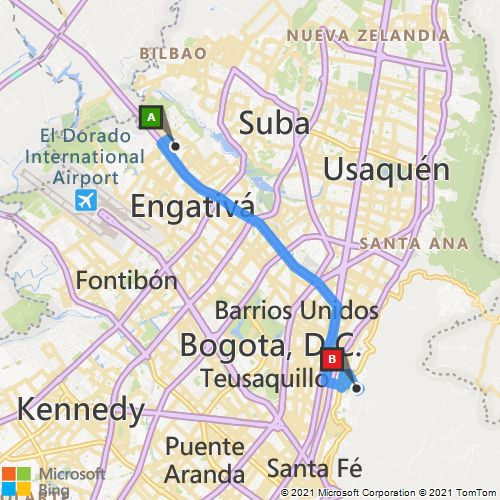

In [135]:
ruta.obtener_imagen()

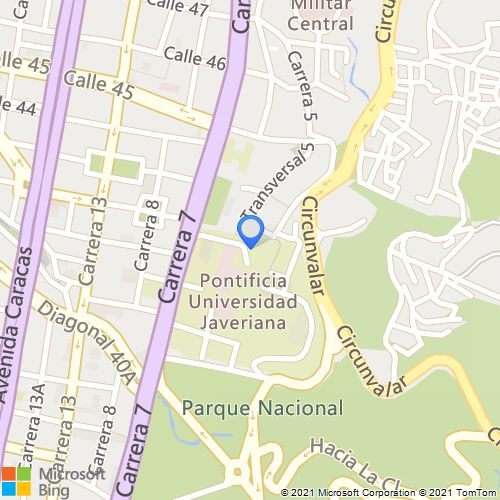

In [136]:
localizacion_final.obtener_imagen()

## Se puede obtener una lista con las indicaciones de la ruta de conducción que arroja BingMaps

In [137]:
# Los siguientes dos métodos son dadas las indicaciones a partir de la ruta de conducción entre los puntos

lista_indicaciones_en = ruta.indicaciones_ruta(traducir=False)

# La traducción al idioma español no es recomendada ya que en algunas ocaciones no hace ninguna traducción
# o solo realiza algunas traducciones o la traducción es poco correcta.
lista_indicaciones_es = ruta.indicaciones_ruta(traducir=True)

In [138]:
print("Indicaciones entre {} y {} sin traducción: {}".format(latlng_inicial, latlng_final, lista_indicaciones_en))
print()
print("Indicaciones entre {} y {} con traducción: {}".format(direccion_inicial, direccion_final, lista_indicaciones_es))

Indicaciones entre (4.7072153, -74.1306008) y (4.628766199999999, -74.06362986475955) sin traducción: ['Head north on Carrera 111c toward Calle 82', 'Bear left onto Calle 82', 'Road name changes to Carrera 112Bis', 'Bear right onto Carrera 112F,  then immediately bear right onto Carrera 114', 'Road name changes to Calle 81', 'Turn left', 'Keep straight to get onto Carrera 114', 'Turn left onto Calle 80', 'Keep straight to get onto road', 'Keep straight to get onto road', 'Keep straight to get onto Calle 80', 'Keep straight, heading toward Calle 80', 'Keep straight to get onto Calle 80', 'Keep straight to get onto Entrada A La Autonorte', 'Bear right onto 55 / Autonorte, then keep straight to get onto Autonorte', 'Road name changes to Avenida Caracas', 'Turn left onto Calle 63', 'Turn right onto Carrera 13', 'Turn left onto Calle 53', 'Road name changes to Entrada a Calle 53', 'Take the ramp on the left for Circunvalar', 'Turn right, then immediately turn right onto Calle 59', 'Road nam